<a href="https://colab.research.google.com/github/yohanesnuwara/pyreservoir/blob/master/notebooks/decline_curve_analysis_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/yohanesnuwara/pyreservoir

Cloning into 'pyreservoir'...
remote: Enumerating objects: 227, done.
remote: Counting objects: 100% (227/227), done.
remote: Compressing objects: 100% (219/219), done.
remote: Total 885 (delta 115), reused 0 (delta 0), pack-reused 658
Receiving objects: 100% (885/885), 24.17 MiB | 16.53 MiB/s, done.
Resolving deltas: 100% (469/469), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append("/content/pyreservoir/dca")

from dca import hyperbolic, arps_fit, arps_bootstrap

In [3]:
df = pd.read_csv('/content/pyreservoir/data/norne_production_rate_sample.csv')

# convert date string to Panda datetime format
df['Date'] =  pd.to_datetime(df['Date'], format='%Y-%m-%d') 

t = df['Date']
q = df['Rate (SCF/d)']

print(df.head(10))

        Date  Rate (SCF/d)
0 2004-04-01    2706039.00
1 2004-05-01    2492086.20
2 2004-06-02    1816846.10
3 2004-07-02    1920207.40
4 2004-07-04    1683521.40
5 2004-07-25    1847040.90
6 2004-08-01    1536201.60
7 2004-08-16    1711845.00
8 2004-08-17     677522.19
9 2004-09-04     762001.13


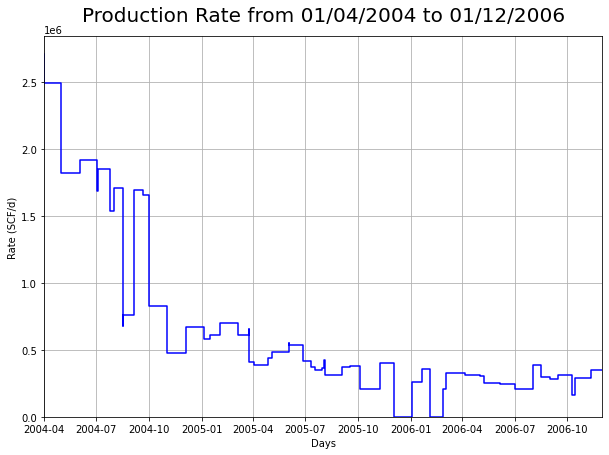

In [4]:
plt.figure(figsize=(10,7))

plt.step(t, q, color='blue')
plt.title('Production Rate from 01/04/2004 to 01/12/2006', size=20, pad=15)
plt.xlabel('Days')
plt.ylabel('Rate (SCF/d)')
plt.xlim(min(t), max(t)); plt.ylim(ymin=0)

plt.grid()
plt.show()

Initial production rate (qi)  : 2866266.45256 SCF
Initial decline rate (di)     : 0.00669 SCF/D
Decline coefficient (b)       : 0.50003
RMSE of regression            : 0.02259


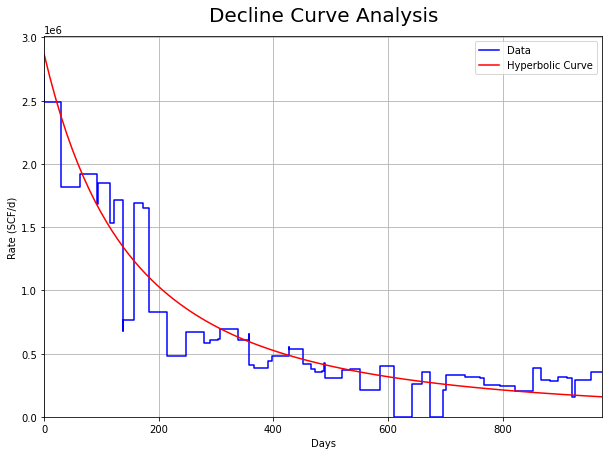

In [5]:
# Decline curve analysis
qi, di, b, RMSE = arps_fit(t, q, plot=True)

95% CI of initial production rate (qi) : 2704787.02987 to 7625823.89798 SCF/D
95% CI of initial decline rate (di)    : 0.00517 to 0.03008 SCF/D
95% CI of decline exponent (b)         : 0.29449 to 0.95562


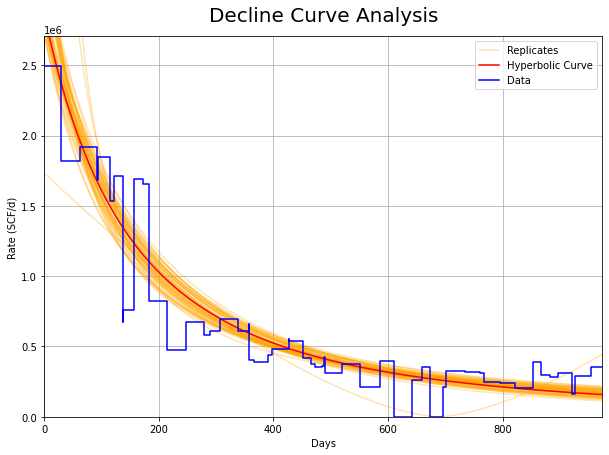

In [117]:
# Decline curve analysis with bootstrapping
ci95_qi, ci95_di, ci95_b = arps_bootstrap(t, q, size=50)